In [4]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import cmocean as cm
import geopandas as gpd
import pandas as pd
import os

In [5]:
xmin = -71.25+0.05
xmax = -69.75-0.05
ymin = 41.6+0.05
ymax = 42.8-0.05

In [6]:
# Adjust the path to your project root directory where 'models' folder is located
project_root = os.path.abspath('../../../')  # or the relative path to your root from the notebook folder

if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.utils import *

In [7]:
project = 'fvcom'

In [8]:
states = gpd.read_file(f'{project_root}/data/massachusetts/s_08mr23.shp')
mass = states[states['NAME']=='Massachusetts']

In [9]:
grid_x = np.load(f'{project_root}/data/{project}/grid_x.npy')
grid_y = np.load(f'{project_root}/data/{project}/grid_y.npy')
grid_x_m, grid_y_m = sp_proj('forward', grid_x, grid_y,  'm')

u1 = np.load(f'{project_root}/data/{project}/u_interp.npy') 
u2 = np.load(f'{project_root}/data/{project}/v_interp.npy')
t = np.load(f'{project_root}/data/{project}/t.npy')
nt, n1, n2 = u1.shape
mask = ~np.isnan(u1[0,:,:])


In [10]:
reference_date = pd.Timestamp("2005-01-01")
datetimes = [reference_date + pd.to_timedelta(days - 732313.0, unit='D') for days in t]
datetimes_np = np.array(datetimes, dtype='datetime64[ns]')

In [19]:
timestep = 500

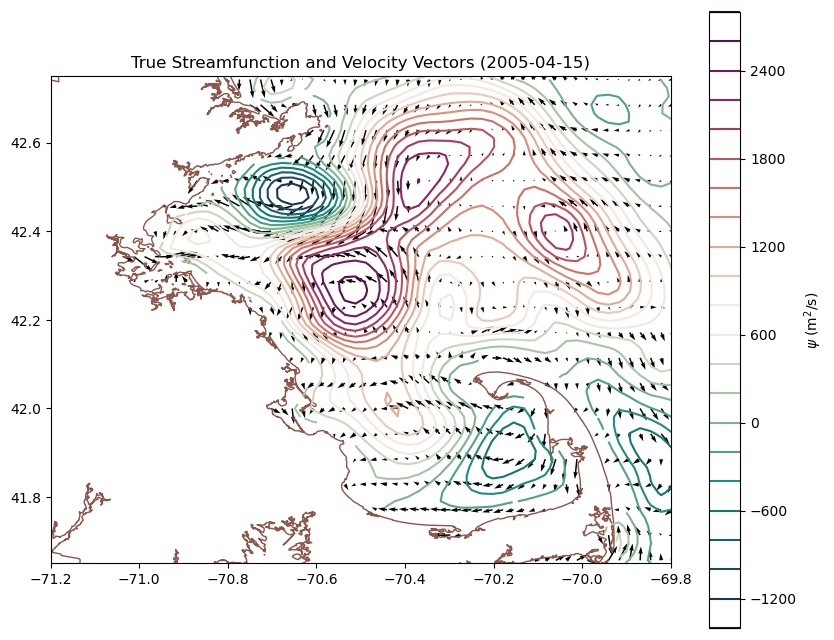

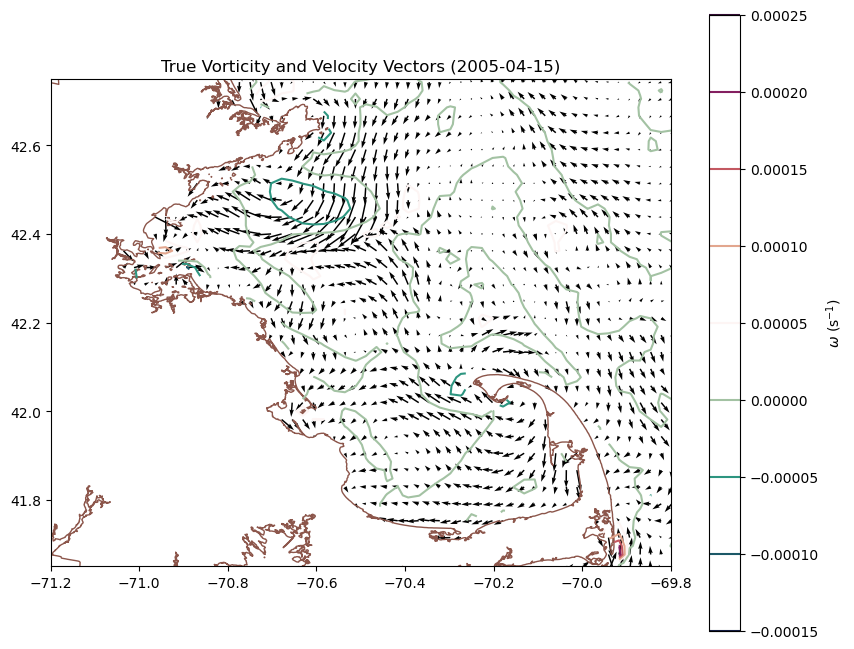

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))

omega_test = vort_FVCOM(u1[timestep], u2[timestep], grid_x_m, grid_y_m)
omega_test[np.abs(omega_test)>3*np.std(omega_test)] = np.nan
psi_test = streamfunction_FVCOM(omega_test, grid_x_m, grid_y_m)

# Plot true streamfunction (psi)
# First subplot: Streamfunction
cf1 = ax.contour(grid_x, grid_y, psi_test, levels=20, cmap=cm.cm.curl)
fig.colorbar(cf1, ax=ax, orientation='vertical', label='$\psi$ (m$^2$/s)')

# Overlay quiver for true u and v
ax.quiver(grid_x[::3], grid_y[::3], u1[timestep][::3], u2[timestep][::3], scale=7, scale_units='xy')

# Plot Massachusetts outline
mass.plot(ax=ax, color='none', edgecolor='tab:brown')

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')
ax.set_title(f'True Streamfunction and Velocity Vectors ({str(datetimes_np[timestep][0])[:10]})')

# Second subplot: Vorticity
fig2, ax2 = plt.subplots(figsize=(10, 8))
cf2 = ax2.contour(grid_x, grid_y, omega_test, cmap=cm.cm.curl)
fig2.colorbar(cf2, ax=ax2, orientation='vertical', label='$\omega$ (s$^{-1}$)')

# Overlay quiver for true u and v
ax2.quiver(grid_x[::2], grid_y[::2], u1[timestep][::2], u2[timestep][::2], scale=7, scale_units='xy')

# Plot Massachusetts outline
mass.plot(ax=ax2, color='none', edgecolor='tab:brown')

ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
ax2.set_aspect('equal')
ax2.set_title(f'True Vorticity and Velocity Vectors ({str(datetimes_np[timestep][0])[:10]})')

plt.show()